# Assignments

Lakukan regresi menggunakan MLP dengan dataset **Auto**, **Auto-MPG** dan **Bottle**! Gunakan 2 arsitektur MLP yang mirip seperti diatas beserta linear regression dan simpulkan hasil yang terbaik!

## Catatan:

1. Gunakan ratio training:testing set sebesar 80:20 untuk dataset **Auto & Auto-MPG**, sedangkan untuk dataset **Bottle** gunakan ratio 75:25. Selain itu, gunakan random_state=10 apabila dibutuhkan.

2. Untuk dataset **Auto**, gunakan kolom-kolom ini saja (sisanya di-drop):
  - wheel-base 
  - length 
  - width 
  - height 
  - bore
  - stroke
  - compression-ratio
  - peak-rpm
  - price

3. Untuk dataset **Bottle** lakukan regresi terhadap attribute **Salinity**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Bootcamp ML2020/dataset/auto.csv')
dataset1 = pd.read_csv('/content/drive/My Drive/Bootcamp ML2020/dataset/auto-mpg.csv')
dataset2 = pd.read_csv('/content/drive/My Drive/Bootcamp ML2020/dataset/bottle-updated.csv')

In [4]:
dataset.describe().transpose()
# dataset1.describe().transpose()
# dataset2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


##Data Cleaning

###Auto

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [6]:
dataset=dataset.drop(['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','curb-weight','engine-type','num-of-cylinders',' engine-size','fuel-system','horsepower','city-mpg','highway-mpg'], axis=1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   bore               205 non-null    object 
 5   stroke             205 non-null    object 
 6   compression-ratio  205 non-null    float64
 7   peak-rpm           205 non-null    object 
 8   price              205 non-null    object 
dtypes: float64(5), object(4)
memory usage: 14.5+ KB


In [8]:
dataset = dataset.rename(columns={'peak-rpm': 'peak_rpm'})
dataset = dataset.rename(columns={'compression-ratio': 'compression_ratio'})

In [9]:
dataset.head()

,wheel-base,length,width,height,bore,stroke,compression_ratio,peak_rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450


In [10]:
dataset.replace("?", np.nan, inplace=True)

In [11]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
compression_ratio    0
peak_rpm             2
bore                 4
stroke               4
price                4
dtype: int64

In [12]:
dataset.columns

Index(['wheel-base', 'length', 'width', 'height', 'bore', 'stroke',
       'compression_ratio', 'peak_rpm', 'price'],
      dtype='object')

In [13]:
avg_peak_rpm = dataset["peak_rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm: ", avg_peak_rpm)
avg_bore = dataset["bore"].astype("float").mean(axis=0)
print("Average of bore: ", avg_bore)
avg_stroke = dataset["stroke"].astype("float").mean(axis=0)
print("Average of stroke: ", avg_stroke)
avg_price = dataset["price"].astype("float").mean(axis=0)
print("Average of price: ", avg_price)

Average of peak-rpm:  5125.369458128079
Average of bore:  3.3297512437810957
Average of stroke:  3.2554228855721337
Average of price:  13207.129353233831


In [14]:
dataset.dropna(subset=["price"], axis=0, inplace=True)

In [15]:
dataset["peak_rpm"].replace(np.nan, avg_peak_rpm, inplace=True)
dataset["bore"].replace(np.nan, avg_bore, inplace=True)
dataset["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [16]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression_ratio    0
peak_rpm             0
price                0
dtype: int64

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    object 
 5   stroke             201 non-null    object 
 6   compression_ratio  201 non-null    float64
 7   peak_rpm           201 non-null    object 
 8   price              201 non-null    object 
dtypes: float64(5), object(4)
memory usage: 15.7+ KB


In [18]:
dataset["price"] = dataset.price.astype(int)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    object 
 5   stroke             201 non-null    object 
 6   compression_ratio  201 non-null    float64
 7   peak_rpm           201 non-null    object 
 8   price              201 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 15.7+ KB


In [20]:
dataset["peak_rpm"] = dataset.peak_rpm.astype(int)
dataset["stroke"] = dataset.stroke.astype(float)
dataset["bore"] = dataset.bore.astype(float)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    float64
 5   stroke             201 non-null    float64
 6   compression_ratio  201 non-null    float64
 7   peak_rpm           201 non-null    int64  
 8   price              201 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 15.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5769fb1da0>,
      dtype=object)

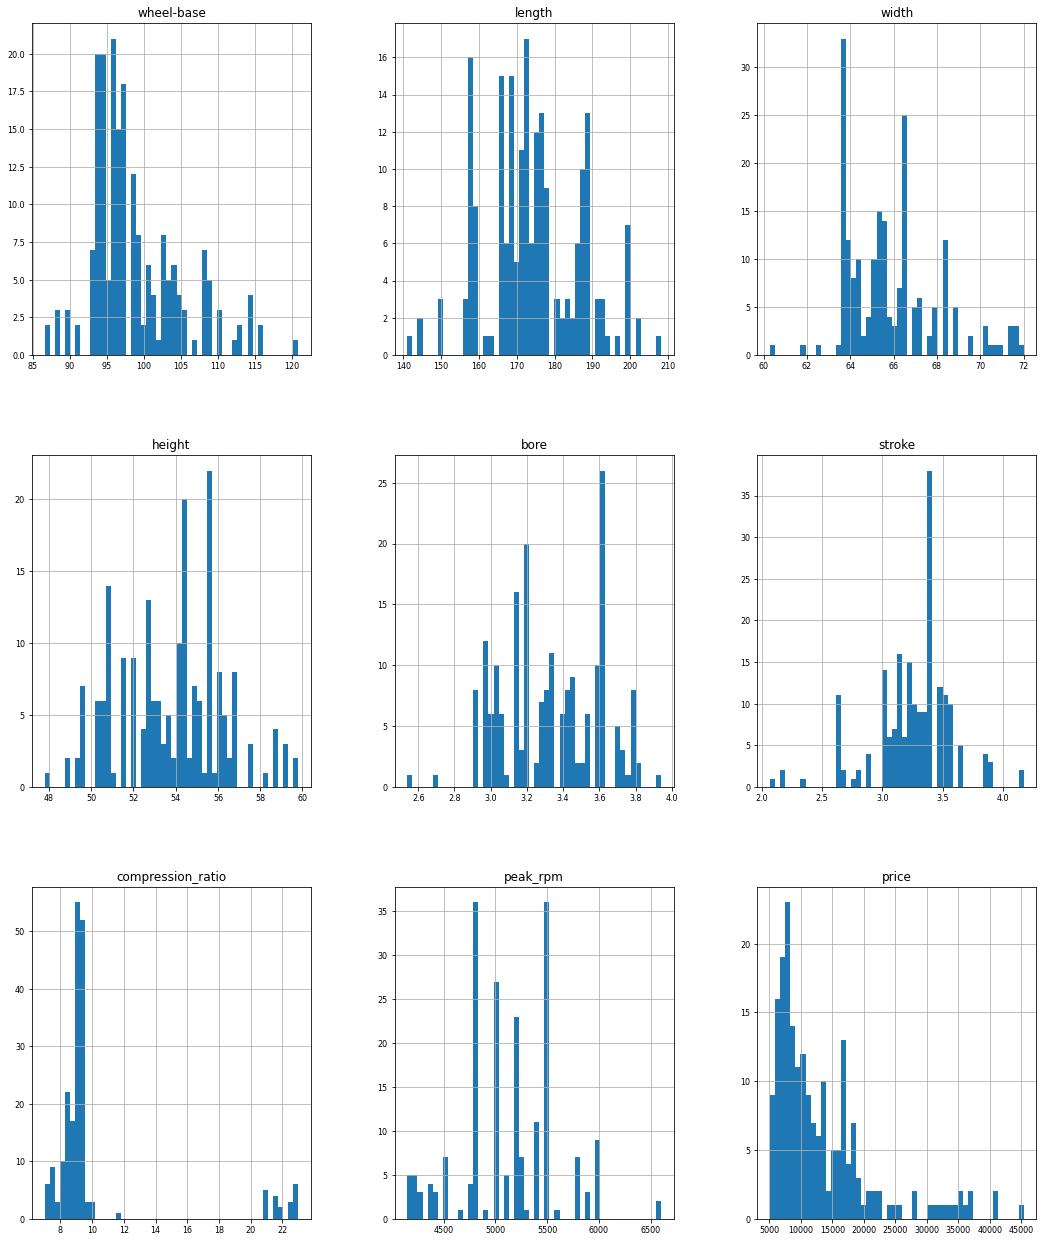

In [22]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [23]:
corr = dataset.corr()

corr

,wheel-base,length,width,height,bore,stroke,compression_ratio,peak_rpm,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.493244,0.158018,0.250313,-0.360301,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.608971,0.123952,0.159733,-0.285973,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.544885,0.188822,0.189867,-0.245803,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.180449,-0.060663,0.259737,-0.309971,0.135486
bore,0.493244,0.608971,0.544885,0.180449,1.000000,-0.055390,0.001263,-0.267395,0.543155
stroke,0.158018,0.123952,0.188822,-0.060663,-0.055390,1.000000,0.187871,-0.063577,0.082269
compression_ratio,0.250313,0.159733,0.189867,0.259737,0.001263,0.187871,1.000000,-0.435777,0.071107
peak_rpm,-0.360301,-0.285973,-0.245803,-0.309971,-0.267395,-0.063577,-0.435777,1.000000,-0.101612
price,0.584642,0.690628,0.751265,0.135486,0.543155,0.082269,0.071107,-0.101612,1.000000


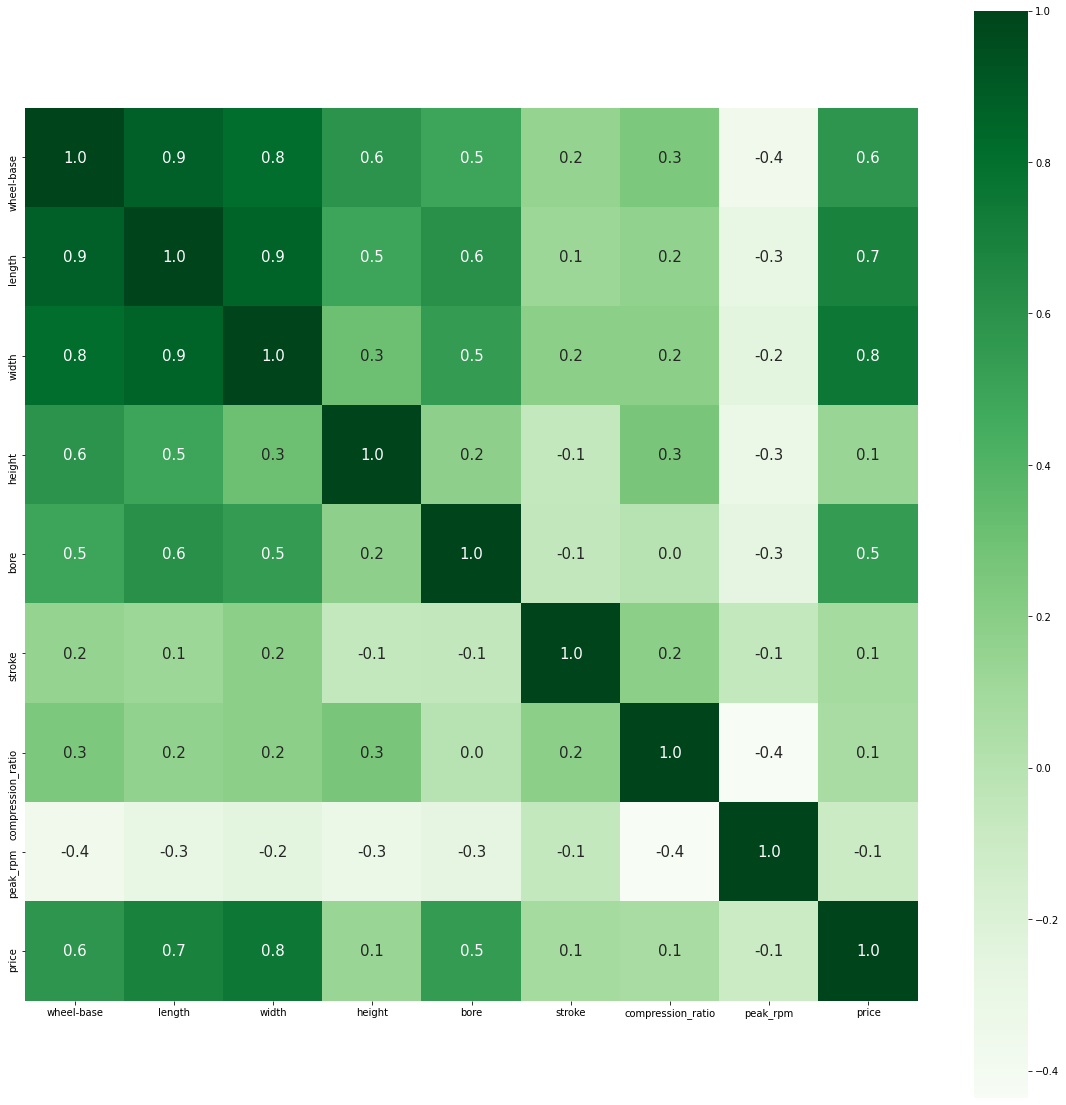

In [24]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

###Auto-mpg

In [25]:
dataset1.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [26]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [27]:
dataset1.replace("?", np.nan, inplace=True)

In [31]:
dataset1.isnull().sum().sort_values()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [29]:
dataset1 = dataset1.rename(columns={'car name': 'car_name'})
dataset1 = dataset1.rename(columns={'model year': 'model_year'})

In [33]:
dataset1.dropna(subset=["horsepower"], axis=0, inplace=True)

In [34]:
dataset1.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [35]:
dataset1.isnull().sum().sort_values()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [36]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    object 
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   car_name      392 non-null    object 
 8   mpg           392 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [37]:
dataset1["horsepower"] = dataset1.horsepower.astype(int)

In [38]:
dataset1=dataset1.drop(['car_name'], axis=1)

In [39]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5766914ef0>,
      dtype=object)

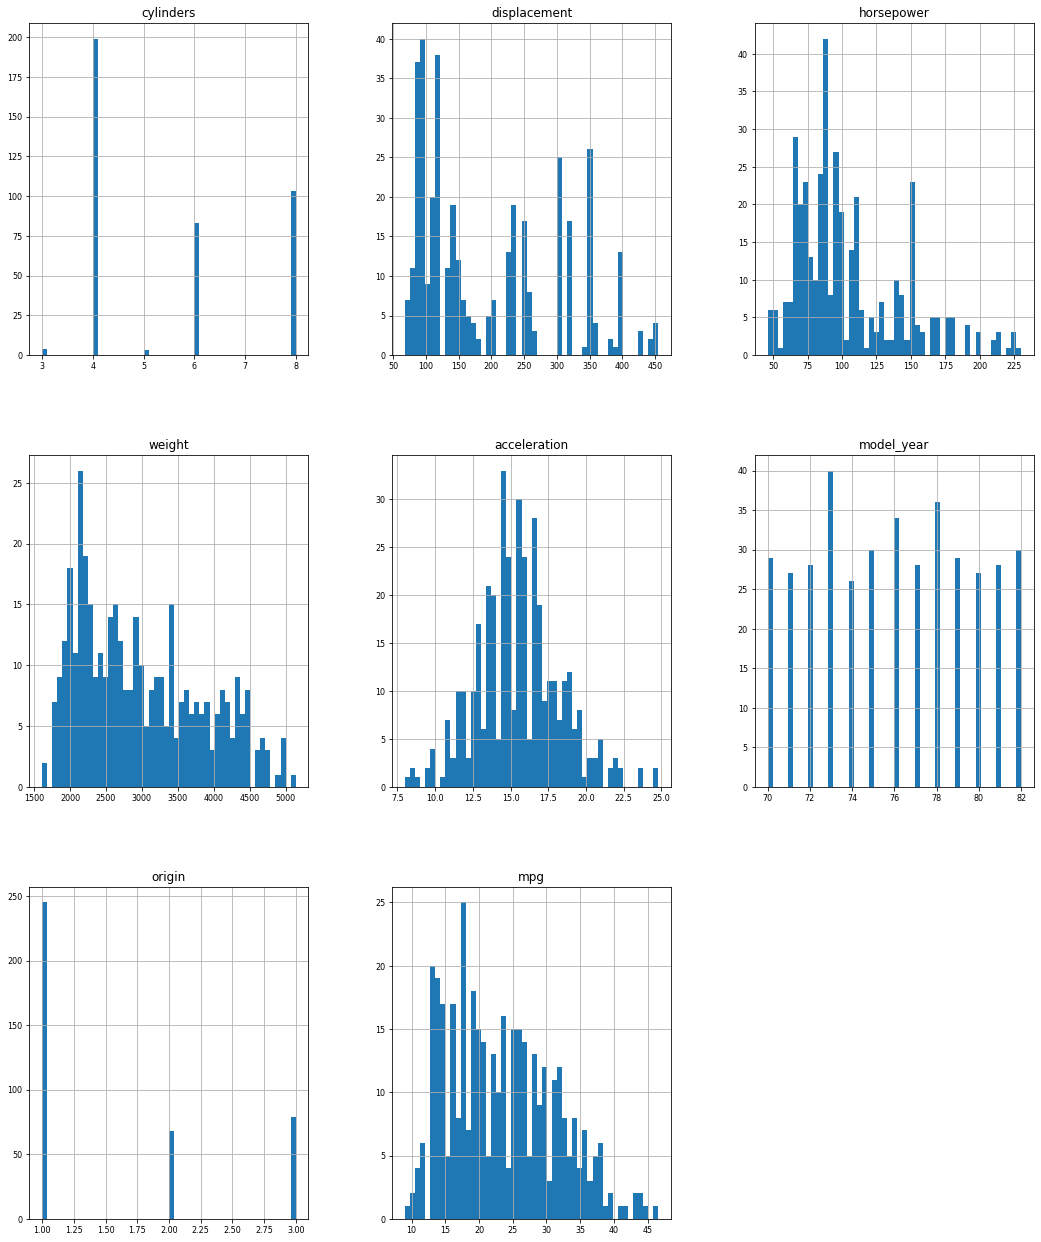

In [40]:
dataset1.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [41]:
corr1 = dataset1.corr()

corr1

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.423329
model_year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.580541
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.565209
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000


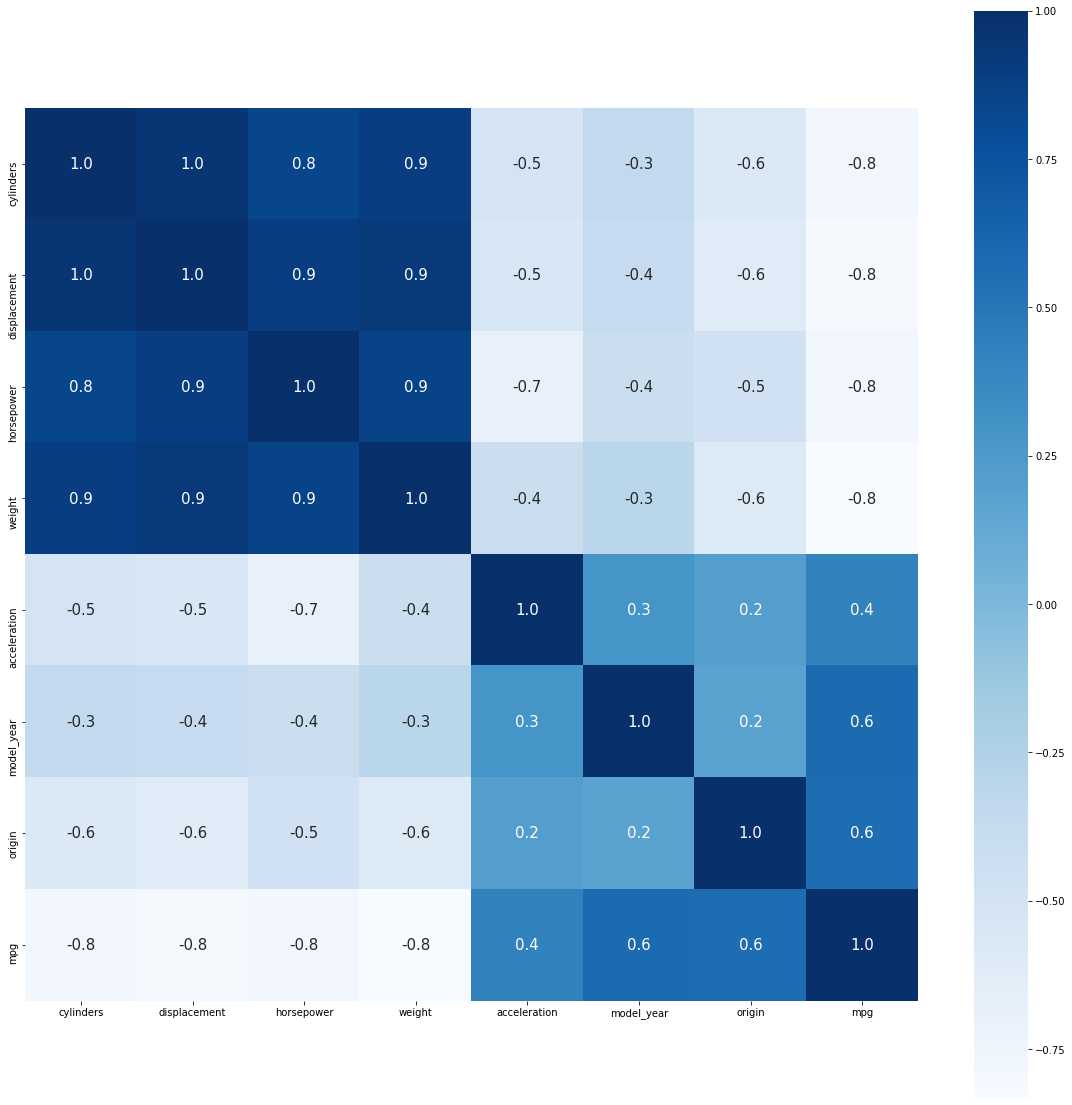

In [42]:
plt.figure(figsize=(20,20))
sb.heatmap(corr1, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

###Bottle

In [43]:
dataset2.head(10)

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421
5,5,30,10.45,33.431
6,6,39,10.45,33.440
7,7,50,10.24,33.424
8,8,58,10.06,33.420
9,9,75,9.86,33.494


In [44]:
dataset2.columns

Index(['Unnamed: 0', 'Depthm', 'T_degC', 'Salnty'], dtype='object')

In [45]:
dataset2=dataset2.drop(['Unnamed: 0'], axis=1)

In [46]:
dataset2.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [47]:
dataset2.replace("?", np.nan, inplace=True)

In [48]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  864863 non-null  int64  
 1   T_degC  853900 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


In [49]:
dataset2.isnull().sum().sort_values()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [50]:
dataset2.dropna(subset=["Salnty"], axis=0, inplace=True)

In [51]:
dataset2.isnull().sum().sort_values()

Depthm       0
Salnty       0
T_degC    3262
dtype: int64

In [52]:
avg_T_degC = dataset2["T_degC"].astype("float").mean(axis=0)
print("Average of T_degC: ", avg_T_degC)

Average of T_degC:  10.860287286289667


In [53]:
dataset2["T_degC"].replace(np.nan, avg_T_degC, inplace=True)

In [54]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817509 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  817509 non-null  int64  
 1   T_degC  817509 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 24.9 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f576493ee48>,
      dtype=object)

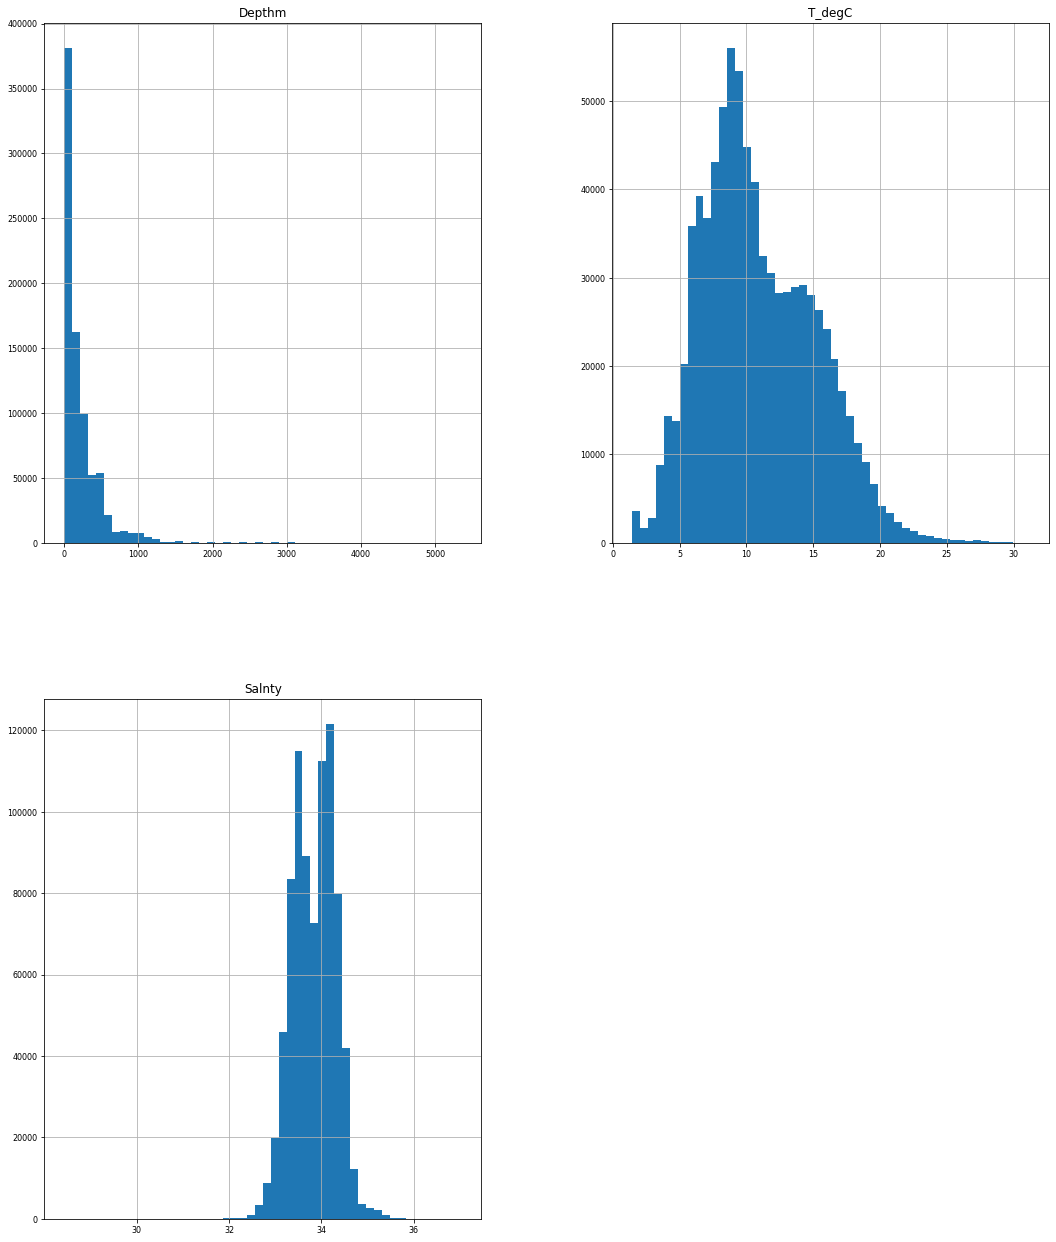

In [55]:
dataset2.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [56]:
corr2 = dataset2.corr()

corr2

,Depthm,T_degC,Salnty
Depthm,1.00000,-0.67563,0.57263
T_degC,-0.67563,1.00000,-0.50403
Salnty,0.57263,-0.50403,1.00000


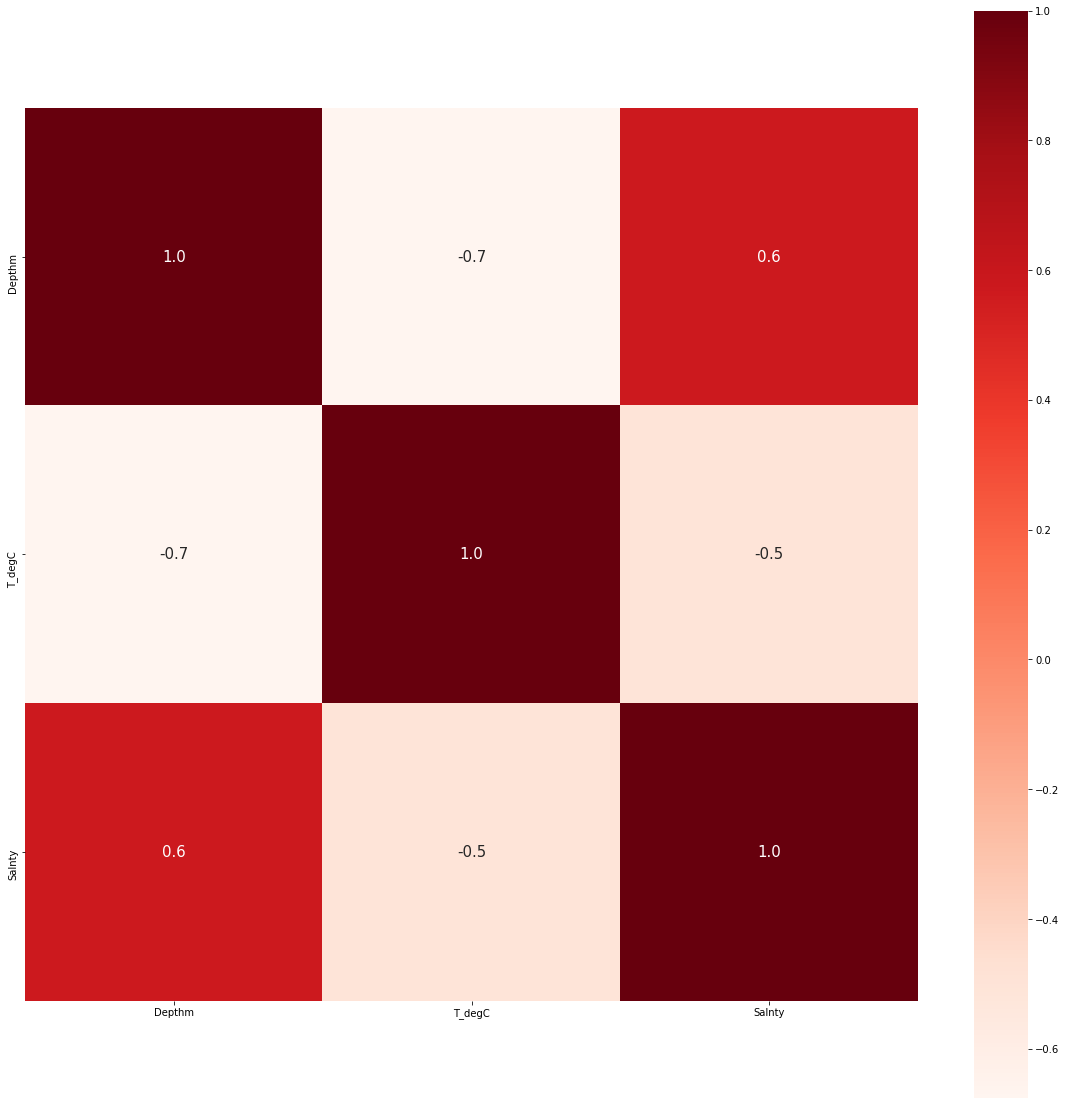

In [57]:
plt.figure(figsize=(20,20))
sb.heatmap(corr2, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

##Feature Engineering

###Auto

In [58]:
label = dataset['price']
features = dataset.drop(['price'], axis=1)

In [59]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [60]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.24476662263942497
MAE (Mean Absolute Error) 0.37372521049571594
r^2 score 0.6582056273325015
RMSE (Root Mean Squared Error 0.49473894392843687


###Auto-MPG

In [62]:
label1 = dataset1['mpg']
features1 = dataset1.drop(['mpg'], axis=1)

In [63]:
scaler1 = preprocessing.StandardScaler()

features1 = scaler1.fit_transform(features1.values)
label1 = scaler1.fit_transform(label1.values.reshape(-1,1)).flatten()

In [64]:
feature_train1, feature_test1, label_train1, label_test1 = train_test_split(features1, label1, test_size=0.2, random_state=10)

In [65]:
lm1 = LinearRegression()
lm1.fit(feature_train1, label_train1)

predictions1 = lm1.predict(feature_test1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse1 = mean_squared_error(label_test1, predictions1)
mae1 = mean_absolute_error(label_test1, predictions1)
r21 = r2_score(label_test1, predictions1)
print("MSE (Mean Squared Error)", mse1)
print("MAE (Mean Absolute Error)", mae1)
print("r^2 score", r21)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test1, predictions1)))

MSE (Mean Squared Error) 0.2173837145152616
MAE (Mean Absolute Error) 0.3420165569616647
r^2 score 0.7847120794656518
RMSE (Root Mean Squared Error 0.4662442648604502


###Bottle

In [66]:
label2 = dataset2['Salnty']
features2 = dataset2.drop(['Salnty'], axis=1)

In [67]:
scaler2 = preprocessing.StandardScaler()

features2 = scaler2.fit_transform(features2.values)
label2 = scaler2.fit_transform(label2.values.reshape(-1,1)).flatten()

In [68]:
feature_train2, feature_test2, label_train2, label_test2 = train_test_split(features2, label2, test_size=0.25, random_state=10)

In [70]:
lm2 = LinearRegression()
lm2.fit(feature_train2, label_train2)

predictions2 = lm2.predict(feature_test2)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse2 = mean_squared_error(label_test2, predictions2)
mae2 = mean_absolute_error(label_test2, predictions2)
r22 = r2_score(label_test2, predictions2)
print("MSE (Mean Squared Error)", mse2)
print("MAE (Mean Absolute Error)", mae2)
print("r^2 score", r22)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test2, predictions2)))

MSE (Mean Squared Error) 0.643590733810759
MAE (Mean Absolute Error) 0.5597716315393305
r^2 score 0.35420711441816666
RMSE (Root Mean Squared Error 0.8022410696360285


##Deep Learning

###Auto

####Baseline Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelb = Sequential()
modelb.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
modelb.add(Dense(1, kernel_initializer='normal'))

modelb.compile(loss='mean_squared_error', optimizer='adam')

In [85]:
historyb = modelb.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2720 - val_loss: 0.2286
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2695 - val_loss: 0.2245
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2681 - val_loss: 0.2191
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2649 - val_loss: 0.2210
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2615 - val_loss: 0.2208
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2589 - val_loss: 0.2149
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2566 - val_loss: 0.2123
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2562 - val_loss: 0.2159
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2509 - val_loss: 0.2114
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.2493 - val_loss: 0.2080
Epoch 11/50
20/20 [

In [76]:
predictionsb = modelb.predict(feature_test)

predictionsb = predictionsb.flatten()

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mseb = mean_squared_error(label_test, predictionsb)
maeb = mean_absolute_error(label_test, predictionsb)
r2b = r2_score(label_test, predictionsb)
print("MSE (Mean Squared Error)", mseb)
print("MAE (Mean Absolute Error)", maeb)
print("r^2 score", r2b)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictionsb)))

MSE (Mean Squared Error) 0.22871697116751005
MAE (Mean Absolute Error) 0.35941876539605144
r^2 score 0.680617508892253
RMSE (Root Mean Squared Error 0.4782436316016242


In [89]:
history_dataframeb = pd.DataFrame(historyb.history)
history_dataframeb['epoch'] = historyb.epoch
history_dataframeb

,loss,val_loss,epoch
0,0.272029,0.228590,0
1,0.269535,0.224499,1
2,0.268131,0.219052,2
3,0.264937,0.220952,3
4,0.261537,0.220800,4
5,0.258900,0.214945,5
6,0.256597,0.212331,6
7,0.256223,0.215853,7
8,0.250889,0.211444,8
9,0.249340,0.207971,9


In [90]:
history_dataframeb.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
47,0.194113,0.190503,47
44,0.196786,0.191575,44
48,0.194516,0.191615,48
46,0.195191,0.191693,46
42,0.198692,0.191952,42
43,0.198005,0.192322,43
45,0.195431,0.192433,45
49,0.192696,0.192830,49
35,0.207488,0.192849,35
40,0.200263,0.193275,40


In [96]:
def plot_loss(hstr):
  plt.plot(hstr.history['loss'], label='loss')
  plt.plot(hstr.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

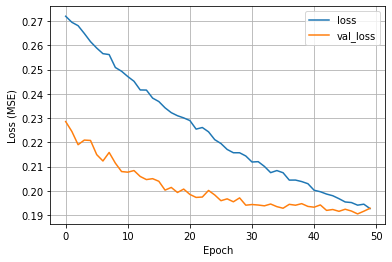

In [97]:
plot_loss(historyb) # epoch vs loss graph

####Deeper Model

In [84]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

historyd = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 5ms/step - loss: 1.0706 - val_loss: 0.7196
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0647 - val_loss: 0.7139
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0511 - val_loss: 0.6981
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0166 - val_loss: 0.6675
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9518 - val_loss: 0.6202
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8604 - val_loss: 0.5561
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7502 - val_loss: 0.4976
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6339 - val_loss: 0.4619
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5411 - val_loss: 0.4446
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4763 - val_loss: 0.4266
Epoch 11/50
20/20 [

In [78]:
predictionsd = deeper_model.predict(feature_test)

predictionsd = predictionsd.flatten()

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

msed = mean_squared_error(label_test, predictionsd)
maed = mean_absolute_error(label_test, predictionsd)
r2d = r2_score(label_test, predictionsd)
print("MSE (Mean Squared Error)", msed)
print("MAE (Mean Absolute Error)", maed)
print("r^2 score", r2d)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictionsd)))

MSE (Mean Squared Error) 0.19042688660189588
MAE (Mean Absolute Error) 0.31263846047158184
r^2 score 0.73408613665025
RMSE (Root Mean Squared Error 0.4363792921323099


In [98]:
history_dataframed = pd.DataFrame(historyd.history)
history_dataframed['epoch'] = historyd.epoch
history_dataframed

,loss,val_loss,epoch
0,1.070645,0.719571,0
1,1.064687,0.713907,1
2,1.051065,0.698075,2
3,1.016609,0.667529,3
4,0.951831,0.620232,4
5,0.860398,0.556143,5
6,0.750227,0.497628,6
7,0.633879,0.461886,7
8,0.541108,0.444643,8
9,0.476311,0.426606,9


In [99]:
history_dataframed.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
49,0.222507,0.173080,49
48,0.229631,0.174100,48
47,0.232935,0.174728,47
45,0.237222,0.176797,45
44,0.240260,0.178156,44
46,0.232483,0.178460,46
42,0.246725,0.179144,42
43,0.242107,0.180033,43
40,0.253538,0.183607,40
41,0.256054,0.183622,41


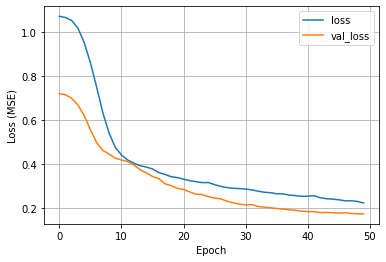

In [100]:
plot_loss(historyd) # epoch vs loss graph

####Wider Model

In [83]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

historyw = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 13ms/step - loss: 1.0559 - val_loss: 0.6971
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9870 - val_loss: 0.6574
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8993 - val_loss: 0.6069
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7952 - val_loss: 0.5553
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6945 - val_loss: 0.5111
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6079 - val_loss: 0.4821
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5397 - val_loss: 0.4681
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4969 - val_loss: 0.4520
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4726 - val_loss: 0.4405
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4487 - val_loss: 0.4293
Epoch 11

In [81]:
predictionsw = wider_model.predict(feature_test)

predictionsw = predictionsw.flatten()

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

msew = mean_squared_error(label_test, predictionsw)
maew = mean_absolute_error(label_test, predictionsw)
r2w = r2_score(label_test, predictionsw)
print("MSE (Mean Squared Error)", msew)
print("MAE (Mean Absolute Error)", maew)
print("r^2 score", r2w)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictionsw)))

MSE (Mean Squared Error) 0.17600316105764244
MAE (Mean Absolute Error) 0.31736972732422947
r^2 score 0.7542275602265714
RMSE (Root Mean Squared Error 0.4195273066889001


In [101]:
history_dataframew = pd.DataFrame(historyw.history)
history_dataframew['epoch'] = historyw.epoch
history_dataframew

,loss,val_loss,epoch
0,1.055929,0.697135,0
1,0.987030,0.657375,1
2,0.899302,0.606950,2
3,0.795198,0.555251,3
4,0.694547,0.511075,4
...,...,...,...
95,0.170457,0.175425,95
96,0.168880,0.177857,96
97,0.166696,0.175900,97
98,0.166012,0.175014,98


In [102]:
history_dataframew.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.165360,0.173137,99
98,0.166012,0.175014,98
95,0.170457,0.175425,95
97,0.166696,0.175900,97
94,0.170205,0.176989,94
...,...,...,...
4,0.694547,0.511075,4
3,0.795198,0.555251,3
2,0.899302,0.606950,2
1,0.987030,0.657375,1


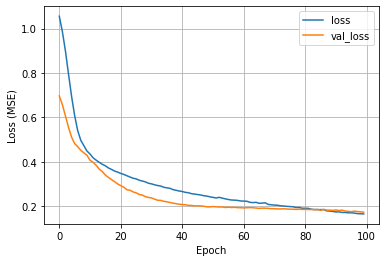

In [103]:
plot_loss(historyw) # epoch vs loss graph

###Auto-MPG

####Baseline Model

In [104]:
modelb1 = Sequential()
modelb1.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
modelb1.add(Dense(1, kernel_initializer='normal'))

modelb1.compile(loss='mean_squared_error', optimizer='adam')

In [105]:
historyb1 = modelb1.fit(x=feature_train1, y=label_train1, validation_data=(feature_test1, label_test1), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9433 - val_loss: 0.9037
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7486 - val_loss: 0.6227
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4654 - val_loss: 0.3409
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2821 - val_loss: 0.2464
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2270 - val_loss: 0.2286
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2079 - val_loss: 0.2127
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1947 - val_loss: 0.2017
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1834 - val_loss: 0.1906
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1746 - val_loss: 0.1818
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1672 - val_loss: 0.1733
Epoch 11/50
40/40 [

In [106]:
predictionsb1 = modelb1.predict(feature_test1)

predictionsb1 = predictionsb1.flatten()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mseb1 = mean_squared_error(label_test1, predictionsb1)
maeb1 = mean_absolute_error(label_test1, predictionsb1)
r2b1 = r2_score(label_test1, predictionsb1)
print("MSE (Mean Squared Error)", mseb1)
print("MAE (Mean Absolute Error)", maeb1)
print("r^2 score", r2b1)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test1, predictionsb1)))

MSE (Mean Squared Error) 0.11235047000583955
MAE (Mean Absolute Error) 0.24808323233572294
r^2 score 0.8887326996295496
RMSE (Root Mean Squared Error 0.33518721635205534


In [112]:
history_dataframeb1 = pd.DataFrame(historyb1.history)
history_dataframeb1['epoch'] = historyb1.epoch
history_dataframeb1

,loss,val_loss,epoch
0,0.943324,0.903688,0
1,0.748607,0.622651,1
2,0.465404,0.340946,2
3,0.282091,0.246401,3
4,0.226968,0.228640,4
5,0.207866,0.212671,5
6,0.194665,0.201697,6
7,0.183446,0.190556,7
8,0.174608,0.181842,8
9,0.167223,0.173317,9


In [113]:
history_dataframeb1.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
46,0.119027,0.110637,46
44,0.119966,0.112034,44
49,0.117295,0.112350,49
45,0.120620,0.112747,45
37,0.121927,0.112960,37
47,0.118531,0.112996,47
48,0.117567,0.113085,48
43,0.119226,0.113144,43
42,0.119544,0.113639,42
41,0.120029,0.114404,41


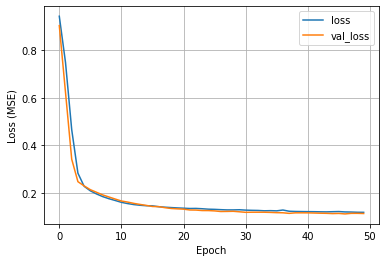

In [114]:
plot_loss(historyb1)

####Deeper Model

In [115]:
deeper_model1 = Sequential()
deeper_model1.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model1.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model1.add(Dense(1, kernel_initializer='normal'))

deeper_model1.compile(loss='mean_squared_error', optimizer='adam')

historyd1 = deeper_model1.fit(x=feature_train1, y=label_train1, validation_data=(feature_test1, label_test1), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9799 - val_loss: 1.0055
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.8915 - val_loss: 0.8245
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6106 - val_loss: 0.4392
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2998 - val_loss: 0.2402
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2149 - val_loss: 0.2209
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1983 - val_loss: 0.2080
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1859 - val_loss: 0.1952
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1758 - val_loss: 0.1857
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1667 - val_loss: 0.1813
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1606 - val_loss: 0.1741
Epoch 11/50
40/40 [

In [118]:
predictionsd1 = deeper_model1.predict(feature_test1)
predictionsd1 = predictionsd1.flatten()


In [119]:
msed1 = mean_squared_error(label_test1, predictionsd1)
maed1 = mean_absolute_error(label_test1, predictionsd1)
r2d1 = r2_score(label_test1, predictionsd1)
print("MSE (Mean Squared Error)", msed1)
print("MAE (Mean Absolute Error)", maed1)
print("r^2 score", r2d1)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test1, predictionsd1)))

MSE (Mean Squared Error) 0.1198222828119206
MAE (Mean Absolute Error) 0.2544620511859192
r^2 score 0.8813329224878715
RMSE (Root Mean Squared Error 0.34615355380512935


In [120]:
history_dataframed1 = pd.DataFrame(historyd1.history)
history_dataframed1['epoch'] = historyd1.epoch
history_dataframed1

,loss,val_loss,epoch
0,0.979939,1.005461,0
1,0.891499,0.824493,1
2,0.610566,0.439191,2
3,0.299798,0.240227,3
4,0.214876,0.220861,4
5,0.198337,0.208023,5
6,0.185942,0.195244,6
7,0.175818,0.185652,7
8,0.166731,0.181301,8
9,0.160568,0.174117,9


In [121]:
history_dataframed1.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
49,0.119488,0.119822,49
44,0.119758,0.120203,44
45,0.121611,0.121057,45
41,0.120813,0.121953,41
48,0.117857,0.122052,48
43,0.120921,0.122163,43
40,0.122418,0.122210,40
47,0.120988,0.122306,47
42,0.120642,0.122319,42
39,0.122505,0.122429,39


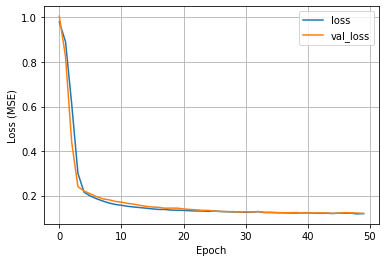

In [122]:
plot_loss(historyd1) # epoch vs loss graph

####Wider Model

In [123]:
wider_model1 = Sequential()
wider_model1.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model1.add(Dense(1, kernel_initializer='normal'))

wider_model1.compile(loss='mean_squared_error', optimizer='adam')

historyw1 = wider_model1.fit(x=feature_train1, y=label_train1, validation_data=(feature_test1, label_test1), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8774 - val_loss: 0.7551
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5753 - val_loss: 0.4024
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3283 - val_loss: 0.2630
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2385 - val_loss: 0.2357
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2142 - val_loss: 0.2176
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1956 - val_loss: 0.2036
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1814 - val_loss: 0.1890
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1685 - val_loss: 0.1759
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1603 - val_loss: 0.1666
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1534 - val_loss: 0.1586
Epoch 11/

In [124]:
predictionsw1 = wider_model1.predict(feature_test1)
predictionsw1 = predictionsw1.flatten()

In [125]:
msew1 = mean_squared_error(label_test1, predictionsw1)
maew1 = mean_absolute_error(label_test1, predictionsw1)
r2w1 = r2_score(label_test1, predictionsw1)
print("MSE (Mean Squared Error)", msew1)
print("MAE (Mean Absolute Error)", maew1)
print("r^2 score", r2w1)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test1, predictionsw1)))

MSE (Mean Squared Error) 0.10627339792026562
MAE (Mean Absolute Error) 0.24248008353843198
r^2 score 0.8947511827305397
RMSE (Root Mean Squared Error 0.3259960090557331


In [126]:
history_dataframew1 = pd.DataFrame(historyw1.history)
history_dataframew1['epoch'] = historyw1.epoch
history_dataframew1

,loss,val_loss,epoch
0,0.877428,0.755053,0
1,0.575295,0.402378,1
2,0.328284,0.263003,2
3,0.238497,0.235717,3
4,0.214232,0.217620,4
...,...,...,...
95,0.105864,0.108612,95
96,0.105515,0.107541,96
97,0.105799,0.109217,97
98,0.105761,0.108323,98


In [127]:
history_dataframew1.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
82,0.107421,0.106229,82
99,0.105411,0.106273,99
90,0.105714,0.107000,90
56,0.110292,0.107225,56
96,0.105515,0.107541,96
...,...,...,...
4,0.214232,0.217620,4
3,0.238497,0.235717,3
2,0.328284,0.263003,2
1,0.575295,0.402378,1


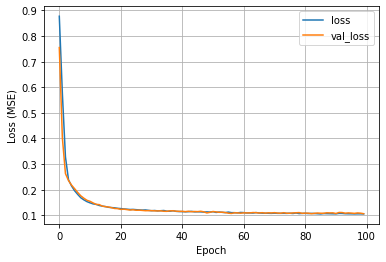

In [128]:
plot_loss(historyw1)

###Bottle

####Baseline Model

In [130]:
modelb2 = Sequential()
modelb2.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
modelb2.add(Dense(1, kernel_initializer='normal'))
modelb2.compile(loss='mean_squared_error', optimizer='adam')

In [131]:
historyb2 = modelb2.fit(x=feature_train2, y=label_train2, validation_data=(feature_test2, label_test2), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 142s 2ms/step - loss: 0.3557 - val_loss: 0.3136
Epoch 2/50
76642/76642 [==============================] - 142s 2ms/step - loss: 0.3131 - val_loss: 0.3069
Epoch 3/50
76642/76642 [==============================] - 141s 2ms/step - loss: 0.3081 - val_loss: 0.3000
Epoch 4/50
76642/76642 [==============================] - 142s 2ms/step - loss: 0.3049 - val_loss: 0.2995
Epoch 5/50
76642/76642 [==============================] - 141s 2ms/step - loss: 0.3045 - val_loss: 0.3037
Epoch 6/50
76642/76642 [==============================] - 141s 2ms/step - loss: 0.3043 - val_loss: 0.3009
Epoch 7/50
76642/76642 [==============================] - 141s 2ms/step - loss: 0.3042 - val_loss: 0.2986
Epoch 8/50
76642/76642 [==============================] - 142s 2ms/step - loss: 0.3041 - val_loss: 0.3014
Epoch 9/50
76642/76642 [==============================] - 141s 2ms/step - loss: 0.3040 - val_loss: 0.3009
Epoch 10/50
76642/76642 [=====================

In [134]:
predictionsb2 = modelb2.predict(feature_test2)

predictionsb2 = predictionsb2.flatten()

In [135]:
mseb2 = mean_squared_error(label_test2, predictionsb2)
maeb2 = mean_absolute_error(label_test2, predictionsb2)
r2b2 = r2_score(label_test2, predictionsb2)
print("MSE (Mean Squared Error)", mseb2)
print("MAE (Mean Absolute Error)", maeb2)
print("r^2 score", r2b2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test2, predictionsb2)))

MSE (Mean Squared Error) 0.2969594315057281
MAE (Mean Absolute Error) 0.35124280340968667
r^2 score 0.7020244728551139
RMSE (Root Mean Squared Error 0.5449398420979403


In [136]:
history_dataframeb2 = pd.DataFrame(historyb2.history)
history_dataframeb2['epoch'] = historyb2.epoch
history_dataframeb2

,loss,val_loss,epoch
0,0.355711,0.313557,0
1,0.313147,0.306948,1
2,0.308067,0.300026,2
3,0.304934,0.299541,3
4,0.304456,0.303680,4
5,0.304307,0.300946,5
6,0.304155,0.298572,6
7,0.304126,0.301384,7
8,0.304047,0.300859,8
9,0.304032,0.299071,9


In [137]:
history_dataframeb2.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
43,0.300287,0.295024,43
34,0.300380,0.295180,34
26,0.300502,0.295344,26
21,0.300467,0.295354,21
29,0.300472,0.295407,29
48,0.300362,0.295520,48
44,0.300342,0.295541,44
39,0.300436,0.295564,39
45,0.300308,0.295634,45
35,0.300407,0.295839,35


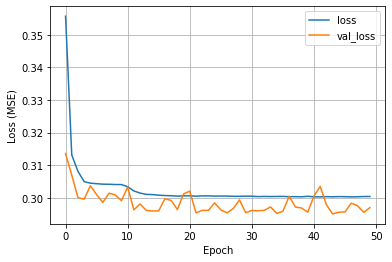

In [138]:
plot_loss(historyb2)

####Deeper Model

In [132]:
deeper_model2 = Sequential()
deeper_model2.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model2.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model2.add(Dense(1, kernel_initializer='normal'))

deeper_model2.compile(loss='mean_squared_error', optimizer='adam')

historyd2 = deeper_model2.fit(x=feature_train2, y=label_train2, validation_data=(feature_test2, label_test2), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 151s 2ms/step - loss: 0.3193 - val_loss: 0.3006
Epoch 2/50
76642/76642 [==============================] - 151s 2ms/step - loss: 0.3048 - val_loss: 0.3005
Epoch 3/50
76642/76642 [==============================] - 151s 2ms/step - loss: 0.3040 - val_loss: 0.3024
Epoch 4/50
76642/76642 [==============================] - 152s 2ms/step - loss: 0.3036 - val_loss: 0.3099
Epoch 5/50
76642/76642 [==============================] - 150s 2ms/step - loss: 0.3028 - val_loss: 0.2976
Epoch 6/50
76642/76642 [==============================] - 149s 2ms/step - loss: 0.3025 - val_loss: 0.2980
Epoch 7/50
76642/76642 [==============================] - 149s 2ms/step - loss: 0.3025 - val_loss: 0.2985
Epoch 8/50
76642/76642 [==============================] - 150s 2ms/step - loss: 0.3022 - val_loss: 0.2979
Epoch 9/50
76642/76642 [==============================] - 150s 2ms/step - loss: 0.3022 - val_loss: 0.2969
Epoch 10/50
76642/76642 [=====================

In [139]:
predictionsd2 = deeper_model2.predict(feature_test2)
predictionsd2 = predictionsd2.flatten()

In [140]:
msed2 = mean_squared_error(label_test2, predictionsd2)
maed2 = mean_absolute_error(label_test2, predictionsd2)
r2d2 = r2_score(label_test2, predictionsd2)
print("MSE (Mean Squared Error)", msed2)
print("MAE (Mean Absolute Error)", maed2)
print("r^2 score", r2d2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test2, predictionsd2)))

MSE (Mean Squared Error) 0.2954994314222707
MAE (Mean Absolute Error) 0.3498997815063983
r^2 score 0.7034894685694912
RMSE (Root Mean Squared Error 0.5435985940216096


In [141]:
history_dataframed2 = pd.DataFrame(historyd2.history)
history_dataframed2['epoch'] = historyd2.epoch
history_dataframed2

,loss,val_loss,epoch
0,0.319333,0.300601,0
1,0.304841,0.300455,1
2,0.304040,0.302381,2
3,0.303572,0.309901,3
4,0.302776,0.297642,4
5,0.302483,0.298038,5
6,0.302463,0.298507,6
7,0.302218,0.297867,7
8,0.302177,0.296870,8
9,0.302081,0.297804,9


In [142]:
history_dataframed2.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
47,0.298257,0.293455,47
41,0.298295,0.293697,41
48,0.298296,0.293796,48
36,0.298524,0.293840,36
42,0.298366,0.293856,42
40,0.298387,0.293889,40
34,0.299647,0.293931,34
46,0.298354,0.294047,46
43,0.298245,0.294525,43
39,0.298414,0.294828,39


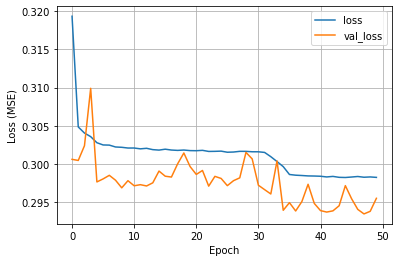

In [143]:
plot_loss(historyd2) # epoch vs loss graph

####Wider Model

In [133]:
wider_model2 = Sequential()
wider_model2.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model2.add(Dense(1, kernel_initializer='normal'))

wider_model2.compile(loss='mean_squared_error', optimizer='adam')

historyw2 = wider_model2.fit(x=feature_train2, y=label_train2, validation_data=(feature_test2, label_test2), epochs=50, batch_size=8)

Epoch 1/100
 6132/76642 [=>............................] - ETA: 1:47 - loss: 0.4071

KeyboardInterrupt: ignored